In [5]:
from pathlib import Path
import duckdb

datadir = Path('../data')
items = duckdb.sql(f'SELECT * FROM "{datadir}/items_small.parquet"')
comments = duckdb.sql(f'SELECT * FROM "{datadir}/comments_small.parquet"')

# Supplement
supplement_tables = '''\
brand_names
item_categories
item_conditions
item_sizes
shipping_durations
shipping_from_areas
shipping_methods
shipping_payers
'''.strip().split()

for table in supplement_tables:
    locals()[table] = duckdb.read_csv(f'../data/supplement/{table}.csv')

In [2]:
sql = '''\
SELECT anon_item_id
FROM items
LEFT JOIN item_categories
ON items.category_id == item_categories.id
WHERE (name0 == 'レディース' and name1 == 'トップス') AND (name NOT LIKE '%様専用%' or name NOT LIKE '%さん専用%')

'''
rel = duckdb.sql(sql)
df = rel.df()
df.to_csv('output.csv',index = False)

In [3]:
import cv2
import os
img_path = 'a98fd13e-9910-4784-9bbf-1d0d561303af'

def createPath(img):
    ext = '_1.jpg'
    img += ext

    testlist = [0,1,2,3]
    testlist[:2]

    root = img[:2]
    child = img[2:4]
    tmp = os.chdir
    new_img_path = ".."
    new_img_path = os.path.join(new_img_path,'w04')
    new_img_path = os.path.join(new_img_path,root)
    new_img_path = os.path.join(new_img_path,child)
    new_img_path = os.path.join(new_img_path,img)   

    return new_img_path

print(createPath(img_path))


..\w04\a9\8f\a98fd13e-9910-4784-9bbf-1d0d561303af_1.jpg


In [4]:


show_image = cv2.imread(new_img_path)

if show_image is None:
    print('error')
cv2.imwrite('testImage.jpg',show_image)


True

In [4]:
import pandas as pd

csv_path = r"C:\Users\caito\Desktop\work\JR-BigData\W03\output.csv"

df = pd.read_csv(csv_path)


for index, row in df.iterrows():
    img_name = row['anon_item_id']
    img_path = createPath(img_name)
    # print(img_path)
    img_name += "_1.jpg"


    image = cv2.imread(img_path)
    new_img_path = ""
    new_img_path = os.path.join(new_img_path,"images")
    new_img_path = os.path.join(new_img_path,img_name)
    if image is None:
        print(f"{img_path} not found")
    else:
        cv2.imwrite(new_img_path,image)
        print(f"save {new_img_path}")




save images\a98fd13e-9910-4784-9bbf-1d0d561303af_1.jpg
save images\9821b910-ffb9-4aa0-a598-6f11baaedf3b_1.jpg
..\w04\5e\22\5e224c7f-52ef-4596-8f2c-a5b0d70b9ee4_1.jpg not found
..\w04\3e\06\3e06719e-4e22-49a7-b5d7-5291ded3a2bd_1.jpg not found
..\w04\5f\c4\5fc47acf-bc5f-438a-8c0a-3949ad90f6b0_1.jpg not found
..\w04\37\fc\37fc65dc-e1c4-43c1-8655-07c6c0c1ee01_1.jpg not found
..\w04\30\a3\30a3083e-6fdd-48f3-a8a3-d7220b9645e9_1.jpg not found
save images\95b4729f-b812-462c-a3c1-07a5f9987098_1.jpg
..\w04\ec\81\ec81d371-51cc-4a16-ba83-0b26f2daaedb_1.jpg not found
..\w04\6b\17\6b170160-e07e-4263-94dd-073106e6ae79_1.jpg not found
save images\9930af90-77f6-4d9a-8a12-be6cc3b07ddf_1.jpg
..\w04\29\19\2919de70-a6af-48ea-bd63-64b019380f4f_1.jpg not found
..\w04\51\61\5161b142-c6c7-462c-a7d5-5db33c28d485_1.jpg not found
..\w04\cc\fc\ccfc9c96-f899-4d7d-93f9-8d89c03132d0_1.jpg not found
..\w04\78\cf\78cf6235-aece-4f7f-a6ca-258d87c14cb8_1.jpg not found
..\w04\01\d3\01d35da0-02b4-4207-8c57-2561a9612cd1_1.jp

In [4]:
import pandas as pd
from pathlib import Path

# ディレクトリパスを設定
model_images_dir = Path('../W04/output/modelimages')
non_model_images_dir = Path('../W04/output/nonmodelImages')

# 画像ファイルの名前を抽出する関数
def extract_image_names(directory):
    return [file.name.replace('_1.jpg', '') for file in directory.iterdir() if file.is_file()]

# modelimagesとnonmodelImagesのファイル名を取得
model_images = extract_image_names(model_images_dir)
non_model_images = extract_image_names(non_model_images_dir)

# データフレームを作成
model_images_df = pd.DataFrame(model_images, columns=['image_name'])
non_model_images_df = pd.DataFrame(non_model_images, columns=['image_name'])

# CSVファイルとして保存
model_images_df.to_csv('model_images_list.csv', index=False)
non_model_images_df.to_csv('non_model_images_list.csv', index=False)

# CSVファイル名を表示して確認
print("Model Images CSV:")
print(model_images_df.head())

print("\nNon-Model Images CSV:")
print(non_model_images_df.head())


Model Images CSV:
                             image_name
0  8a0f9aba-3a87-42c2-bb8b-aff47041f1db
1  8a650481-3229-45ef-8a1c-0fcfdb0df1c7
2  8a7b396c-f4f9-426b-8f8f-8357b075c224
3  8b860e02-b86f-42e3-bd3e-8375117e1d13
4  8b889995-8426-4a00-a7ee-fb9aca019f4f

Non-Model Images CSV:
                             image_name
0  8a2fd160-adcf-431e-a1a9-7bc1f0cc7bb2
1  8a31ed45-6b54-4999-960d-53f61c9d7bc7
2  8a337529-1359-4303-b90f-8e3eeba579f3
3  8a3ce872-5971-45b1-a02d-c2831922d765
4  8a443701-b061-498d-88d3-ad1647edc322


In [6]:
import pandas as pd
import duckdb

# CSVファイルを読み込む
model_images_df = pd.read_csv('model_images_list.csv')
non_model_images_df = pd.read_csv('non_model_images_list.csv')

# 商品IDのリストを取得
model_image_ids = model_images_df['image_name'].tolist()
non_model_image_ids = non_model_images_df['image_name'].tolist()

# DuckDBのitemsテーブルに対してクエリを実行してsold outの数をカウント

sold_out_model_images_query = f'''
SELECT COUNT(*) as sold_out_count
FROM items
WHERE anon_item_id IN ({','.join(f"'{item_id}'" for item_id in model_image_ids)})
AND status = 'sold_out'
'''

sold_out_non_model_images_query = f'''
SELECT COUNT(*) as sold_out_count
FROM items
WHERE anon_item_id IN ({','.join(f"'{item_id}'" for item_id in non_model_image_ids)})
AND status = 'sold_out'
'''

sold_out_model_images_count = duckdb.sql(sold_out_model_images_query).fetchall()[0][0]
sold_out_non_model_images_count = duckdb.sql(sold_out_non_model_images_query).fetchall()[0][0]

# 結果を表示
print(f"Sold_out count in model_images_list.csv: {sold_out_model_images_count}")
print(f"Sold_out count in non_model_images_list.csv: {sold_out_non_model_images_count}")


Sold_out count in model_images_list.csv: 156
Sold_out count in non_model_images_list.csv: 811


In [1]:
import tkinter as tk
from PIL import Image, ImageTk
import math
import os

# from MyClass import ImageInfo

rootWidth = 600
rootHeight = 600
# ウィンドウのリサイズが終わったかどうかを判定するための変数
resize_id = None
# ページを管理する変数
current_page_index = 0

# 画像のパス
# !!!!!!!!!!!!!!!!!root_images_pathを画像があるディレクトリに設定!!!!!!!!!!!!!!!!!!!!
root_images_path = r"C:\Users\caito\Desktop\work\JR-BigData\W03\images"
#root_images_pathパスにあるjpgファイルのパスを取得
images_path = [os.path.join(root_images_path, f) for f in os.listdir(root_images_path) if f.endswith(".jpg")]


# 総ページ数
total_page = math.ceil(len(images_path) / 6)

# 画像の状態を管理するための辞書型の変数
imageStatus = {}

# csvファイルのpath
# !!!!!!!!!!!!!!!!!csv_pathをcsvファイルがあるディレクトリに設定!!!!!!!!!!!!!!!!!!!!
#　初めはcsvファイルがなくても良い,pathを指定していれば作ってくれる
csv_path = r"C:\Users\caito\Desktop\work\JR-BigData\W03\output2.csv"

# output/にimage_status.csvがある場合
if os.path.exists(csv_path):
    # csvファイルを読み込む
    import pandas as pd
    df = pd.read_csv(csv_path)
    # pathとstatusを取得
    for i in range(len(df)):
        # current_page_indexを取得
        if df.loc[i, "path"] == "current_page_index":
            current_page_index = int(df.loc[i, "status"])
        else:
            imageStatus[df.loc[i, "path"]] = df.loc[i, "status"]
        


class ImageInfo:
    def __init__(self, path):
        self.path = path
        self.image = Image.open(path)
        self.width, self.height = self.image.size
        self.photo = ImageTk.PhotoImage(self.image)
        self.image_status = "no_model"  #initial, model, no_model, error(様専用)
        
    def get_path(self):
        return self.path
        
    def get_image(self):
        return self.image
    
    def get_photo(self):
        return self.photo
    
    def get_image_status(self):
        return self.image_status
    
    def set_image_status(self, status):
        self.image_status = status
        
    
    def reSize(self, maxWidth, maxHeight):
        aspect_ratio = self.width / self.height
        
        # 新しいサイズを計算
        if self.width / maxWidth > self.height / maxHeight:
            new_width = maxWidth
            new_height = int(maxWidth / aspect_ratio)
            position = (0, (maxHeight - new_height) // 2)
        else:
            new_width = int(maxHeight * aspect_ratio)
            new_height = maxHeight
            position = ((maxWidth - new_width) // 2, 0)
        
        # 画像をリサイズ
        self.image = self.image.resize((new_width, new_height))
        self.width, self.height = self.image.size
        self.photo = ImageTk.PhotoImage(self.image)
        
        return position
        
        
    
# 画像をリサイズする関数
def resize_image():
    print("画像のリサイズ")
    for i in range(3):
        for j in range(2):
            # キャンバスのサイズを取得
            canvasWidth = canvases[i][j].winfo_width()
            canvasHeight = canvases[i][j].winfo_height()
            print(f"Width: {canvasWidth}, Height: {canvasHeight}")
            # 画像がない場合
            if imageInfs[i][j] is None:
                photo = None
                position = (0, 0)
            else:
                # 画像をリサイズ
                image = imageInfs[i][j]
                position = image.reSize(canvasWidth, canvasHeight)
                photo = image.get_photo()
            canvases[i][j].delete("all")
            canvases[i][j].create_image(position[0],position[1], anchor=tk.NW, image=photo)
            # canvases[i][j].image = photo 
            
# ウィンドウのリサイズが終わったかどうかを判定する関数
def on_changed(event):
    global resize_id
    if resize_id is not None:
        root.after_cancel(resize_id)
    resize_id = root.after(200, resize_image)


# 画像のロード
def load_image():
    global current_page_index, imageStatus
    for i in range(3):
        for j in range(2):
            # ページ番号から画像のインデックスを計算
            img_index = i * 2 + j + current_page_index * 6
            # アクセスできるかどうかの確認
            if img_index < len(images_path):
                imageInfs[i][j] = ImageInfo(images_path[img_index])
                # すでに画像の状態が辞書型の変数にある場合
                if imageInfs[i][j].get_path() in imageStatus:
                    imageInfs[i][j].set_image_status(imageStatus[imageInfs[i][j].get_path()])
            # アクセスできない場合
            # Noneを代入
            else:
                imageInfs[i][j] = None
    # ボタンの関数の割り当て
    assign_button_function()
    # キャンバスの色をimageStatusに応じて変更
    change_canvas_color()

# 画像をロードすると同時に、ボタンの関数の割り当てをする必要がある
def assign_button_function():
    for i in range(3):
        for j in range(2):
            button_list[i][j][0].config(command=lambda i = i, j = j:change_image_status(imageInfs[i][j], "no_model"))
            button_list[i][j][1].config(command=lambda i = i, j = j:change_image_status(imageInfs[i][j], "model"))
            button_list[i][j][2].config(command=lambda i = i, j = j:change_image_status(imageInfs[i][j], "error"))
            
# 画像をロードすると同時に、キャンバスの色をimageStatusに応じて変更する
def change_canvas_color():
    for i in range(3):
        for j in range(2):
            if imageInfs[i][j] is not None:
                image_status = imageInfs[i][j].get_image_status()
                if image_status == "no_model":
                    canvases[i][j].config(bg="black")
                    frames[i][j].config(bg="black")
                elif image_status == "model":
                    canvases[i][j].config(bg="lightblue")
                    frames[i][j].config(bg="lightblue")
                elif image_status == "error":
                    canvases[i][j].config(bg="coral")
                    frames[i][j].config(bg="coral")
            else:
                canvases[i][j].config(bg="white")
                frames[i][j].config(bg="white")
                
# ImageInfo.image_statusを変更する関数
def change_image_status(imageInfo, status):
    # 画像がある場合
    if imageInfo is not None:
        #かつstatusがno_model, model, errorの場合
        if status == "no_model" or status == "model" or status == "error":
            imageInfo.set_image_status(status)
    # キャンバスの色を変更
    change_canvas_color()
            
            
# ぺージを変更する前にImageInfo.image_statusを辞書型の変数に保存
def save_image_status():
    for i in range(3):
        for j in range(2):
            # 画像がある場合
            if imageInfs[i][j] is not None:
                status = imageInfs[i][j].get_image_status()
                imageStatus[imageInfs[i][j].get_path()] = imageInfs[i][j].get_image_status()
    
# ページを変更する関数
def reNewPage(action):
    global current_page_index
    #ページを移動してImageInfoが更新される前に
    #ImageInfo.image_statusを保存
    save_image_status()
    renew = False
    # 次のページに移動する場合
    if action == "next":
        #最後のページでない場合
        if current_page_index+1 < total_page:
            current_page_index += 1
            renew = True
    # 前のページに移動する場合
    elif action == "prev":
        # 最初のページでない場合
        if current_page_index > 0:
            current_page_index -= 1
            renew = True
    # ページ番号の更新
    page_label.config(text=f"{current_page_index + 1} / {total_page}")
    
    # 更新があった場合
    if renew:
        # 画像のロード
        load_image()
        # 画像のリサイズ
        resize_image()



# メインウィンドウの作成
root = tk.Tk()
root.title("Tkinter Frame Example")
root.geometry(f'{rootWidth}x{rootHeight}')
# ウィンドウのリサイズが終わったかどうかを判定するための変数
root.bind("<Configure>", on_changed)

for i in range(2):
    root.grid_rowconfigure(i, weight=1)
root.grid_columnconfigure(0, weight=1)
            


# ウィンドウの各行と列が拡張可能であることを設定
for i in range(3):
    root.grid_rowconfigure(i, weight=1)
for j in range(2):
    root.grid_columnconfigure(j, weight=1)

# フレームの作成
frames = [[None for _ in range(2)] for _ in range(3)]
imageInfs = [[None for _ in range(2)] for _ in range(3)]


            
# メインフレームの作成
main_frame = tk.Frame(root, borderwidth=1, relief="solid")
main_frame.pack(expand=True, fill=tk.BOTH)

canvases = [[None for _ in range(2)] for _ in range(3)]
button_frames = [[None for _ in range(2)] for _ in range(3)]
# メインフレームの行と列が拡張可能であることを設定
for i in range(3):
    main_frame.grid_rowconfigure(i, weight=1)
for j in range(2):
    main_frame.grid_columnconfigure(j, weight=1)
    
#ボタンの管理
button_list = [[[None for _ in range(3)] for _ in range(2)] for _ in range(3)]
print(button_list)

# フレームの作成
for i in range(3):
    for j in range(2):
        # imageInfoを取得
        image = imageInfs[i][j]
        
        frames[i][j] = tk.Frame(main_frame, borderwidth=4, relief="sunken")
        # ウィンドウいっぱいにフレームを広げる
        # 3行2列に配置
        frames[i][j].grid(row=i, column=j, sticky="nsew", padx=10, pady=10)
        # フレームの左側にキャンバスを追加
        canvases[i][j] = tk.Canvas(frames[i][j], width=100, height=100, borderwidth=1, relief="ridge")
        canvases[i][j].pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        
        # フレームの右側にフレームを追加
        button_frames[i][j] = tk.Frame(frames[i][j], borderwidth=1, relief="raised", height=100, width=50)
        #　上下に伸縮可能
        button_frames[i][j].pack(side=tk.RIGHT, fill=tk.Y, expand=False)
        

        
        # ボタンフレームにボタンを追加
        button_list[i][j][0] = tk.Button(button_frames[i][j], text="No Model", width=10, height=2, foreground="black", highlightbackground="gray")
        button_list[i][j][0].grid(row=0, column=0, sticky="nsew")
        button_list[i][j][1] = tk.Button(button_frames[i][j], text="Model", width=10, height=2, foreground="blue", highlightbackground="lightblue")
        button_list[i][j][1].grid(row=1, column=0, sticky="nsew")
        button_list[i][j][2] = tk.Button(button_frames[i][j], text="様専用", width=10, height=2, foreground="red", highlightbackground="coral")
        button_list[i][j][2].grid(row=2, column=0, sticky="nsew")


# フッターフレームの作成
footer_frame = tk.Frame(root, borderwidth=1, relief="solid", height=50)
footer_frame.pack(expand=False, fill=tk.BOTH)

# フッターフレームに1行3列のグリッドを設定
footer_frame.grid_rowconfigure(0, weight=1)
footer_frame.grid_columnconfigure(0, weight=1)
footer_frame.grid_columnconfigure(1, weight=1)
footer_frame.grid_columnconfigure(2, weight=1)
# 両端にボタンを配置
prev_button = tk.Button(footer_frame, text="前", width=10, height=2, foreground="black", highlightbackground="gray", command=lambda:reNewPage("prev"))
prev_button.grid(row=0, column=0, sticky="nsew")
next_button = tk.Button(footer_frame, text="次", width=10, height=2, foreground="black", highlightbackground="gray", command=lambda:reNewPage("next"))
next_button.grid(row=0, column=2, sticky="nsew")
# 真ん中にぺージ番号を表示
page_label = tk.Label(footer_frame, text=f"{current_page_index + 1} / {total_page}", width=10, height=2, foreground="black", highlightbackground="gray")
page_label.grid(row=0, column=1, sticky="nsew")

# 画像のロード
load_image()

# メインループの開始
root.mainloop()



import pandas as pd
#辞書型をcsvに保存する

#current_page_indexを保存
imageStatus["current_page_index"] = current_page_index

df = pd.DataFrame(imageStatus.items(), columns=["path", "status"])
df.to_csv(csv_path, index=False)


[[[None, None, None], [None, None, None]], [[None, None, None], [None, None, None]], [[None, None, None], [None, None, None]]]
画像のリサイズ
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
画像のリサイズ
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
Width: 189, Height: 157
画像のリサイズ
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 174
Width: 529, Height: 174
画像のリサイズ
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 174
Width: 529, Height: 174
画像のリサイズ
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 174
Width: 529, Height: 174
画像のリサイズ
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 529, Height: 173
Width: 52

In [6]:
import pandas as pd
from pathlib import Path

# ディレクトリパスを設定
base_dir = Path('../W04/c6~ff')
model_with_path = base_dir / 'モデル有りc6~ff.csv'
model_without_path = base_dir / 'モデル無しc6~ff.csv'

# CSVファイルを読み込み
model_with_df = pd.read_csv(model_with_path)
model_without_df = pd.read_csv(model_without_path)

# anon_item_id列から末尾の"_1"を除去
model_with_df['anon_item_id'] = model_with_df['anon_item_id'].str.replace('_1', '')
model_without_df['anon_item_id'] = model_without_df['anon_item_id'].str.replace('_1', '')

# 新しいCSVファイル名を設定
new_model_with_path = base_dir / 'モデル有り_cleaned.csv'
new_model_without_path = base_dir / 'モデル無し_cleaned.csv'

# 新しいCSVファイルとして保存
model_with_df.to_csv(new_model_with_path, index=False)
model_without_df.to_csv(new_model_without_path, index=False)

# 結果の表示
print(f"新しいCSVファイルが保存されました: {new_model_with_path}")
print(f"新しいCSVファイルが保存されました: {new_model_without_path}")


新しいCSVファイルが保存されました: ..\W04\c6~ff\モデル有り_cleaned.csv
新しいCSVファイルが保存されました: ..\W04\c6~ff\モデル無し_cleaned.csv


In [1]:
import pandas as pd
from pathlib import Path

# データディレクトリの設定
base_path = Path('../W04/small_res')

# CSVファイルの読み込み
file_path = base_path / 'non.csv'
df = pd.read_csv(file_path)

# 削除するanon_item_idのプレフィックス
prefixes_to_remove = ['8a', '8b', '8c', '8d', '8e', '8f', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

# プレフィックスに基づいて行をフィルタリング
df_filtered = df[~df['anon_item_id'].str[:2].isin(prefixes_to_remove)]

# 更新されたデータフレームを新しいCSVファイルとして保存
df_filtered.to_csv(file_path, index=False)


In [2]:
import pandas as pd
from pathlib import Path

# データディレクトリの設定
base_path = Path('../W04/small_res')

# CSVファイルの読み込み
file_path = base_path / 'ari.csv'
df = pd.read_csv(file_path)

# 削除するanon_item_idのプレフィックス
prefixes_to_remove = ['8a', '8b', '8c', '8d', '8e', '8f', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

# プレフィックスに基づいて行をフィルタリング
df_filtered = df[~df['anon_item_id'].str[:2].isin(prefixes_to_remove)]

# 更新されたデータフレームを新しいCSVファイルとして保存
df_filtered.to_csv(file_path, index=False)


In [4]:
import pandas as pd
from pathlib import Path

# ディレクトリパスを設定
base_dir = Path('../W04/small_res')
non_path = base_dir / 'non.csv'
model_without_cleaned_path = base_dir / 'モデル無し_cleaned.csv'
non_model_images_list_path = base_dir / 'non_model_images_list.csv'

# 各CSVファイルを読み込み
non_df = pd.read_csv(non_path)
model_without_cleaned_df = pd.read_csv(model_without_cleaned_path)
non_model_images_list_df = pd.read_csv(non_model_images_list_path)

# 各データフレームの`anon_item_id`列を抽出
non_ids = non_df['anon_item_id']
model_without_cleaned_ids = model_without_cleaned_df['anon_item_id']
non_model_images_list_ids = non_model_images_list_df['anon_item_id']

# `anon_item_id`を1つのデータフレームにまとめる
all_ids = pd.concat([non_ids, model_without_cleaned_ids, non_model_images_list_ids]).drop_duplicates().reset_index(drop=True)

# 新しいデータフレームを作成
combined_df = pd.DataFrame(all_ids, columns=['anon_item_id'])

# 新しいCSVファイル名を設定
output_path = base_dir / 'combined_non_model.csv'

# 新しいCSVファイルとして保存
combined_df.to_csv(output_path, index=False)

# 結果の表示
print(f"新しいCSVファイルが保存されました: {output_path}")


新しいCSVファイルが保存されました: ..\W04\small_res\combined_non_model.csv


In [5]:
import pandas as pd
import duckdb
from pathlib import Path

# データディレクトリの設定
base_path = Path('../W04/small_res')

# CSVファイルの読み込み
combined_has_model = pd.read_csv(base_path / 'combined_has_model.csv')

# items テーブルの読み込み
items = duckdb.sql(f'SELECT * FROM "../data/items_small.parquet"').df()

# 補助テーブルの読み込み
supplement_tables = '''
brand_names
item_categories
item_conditions
item_sizes
shipping_durations
shipping_from_areas
shipping_methods
shipping_payers
'''.strip().split()

supplement_dfs = {}
for table in supplement_tables:
    supplement_dfs[table] = pd.read_csv(f'../data/supplement/{table}.csv')


In [6]:
# combined_has_model と items テーブルを anon_item_id で結合
merged_df = combined_has_model.merge(items, left_on='anon_item_id', right_on='anon_item_id', how='left')

# 補助テーブルを順次結合
merged_df = merged_df.merge(supplement_dfs['brand_names'], left_on='brand_name', right_on='id', how='left', suffixes=('', '_brand_name'))
merged_df = merged_df.merge(supplement_dfs['item_categories'], left_on='category_id', right_on='id', how='left', suffixes=('', '_item_categories'))
merged_df = merged_df.merge(supplement_dfs['item_conditions'], left_on='item_condition', right_on='id', how='left', suffixes=('', '_item_conditions'))
merged_df = merged_df.merge(supplement_dfs['item_sizes'], left_on='size', right_on='id', how='left', suffixes=('', '_item_sizes'))
merged_df = merged_df.merge(supplement_dfs['shipping_durations'], left_on='shipping_duration', right_on='id', how='left', suffixes=('', '_shipping_durations'))
merged_df = merged_df.merge(supplement_dfs['shipping_from_areas'], left_on='shipping_from_area', right_on='id', how='left', suffixes=('', '_shipping_from_areas'))
merged_df = merged_df.merge(supplement_dfs['shipping_methods'], left_on='shipping_method', right_on='id', how='left', suffixes=('', '_shipping_methods'))
merged_df = merged_df.merge(supplement_dfs['shipping_payers'], left_on='shipping_payer', right_on='id', how='left', suffixes=('', '_shipping_payers'))


In [7]:
# 必要なカラムのみ選択して保存
final_columns = [
    'anon_item_id', 'status', 'name', 'description', 'price', 'category_id', 'item_condition', 'size',
    'brand_name', 'shipping_payer', 'shipping_method', 'shipping_from_area', 'shipping_duration', 'num_likes', 
    'num_comments', 'updated', 'created']

# 結合後のデータフレームに含まれるカラムを確認
available_columns = merged_df.columns.tolist()

# 必要なカラムがデータフレームに存在するかをチェックし、存在しないカラムをリストから削除
final_columns = [col for col in final_columns if col in available_columns]

# 必要なカラムのみ選択して保存
final_df = merged_df[final_columns]

# 新しいCSVファイルとして保存
output_path = base_path / 'combined_has_model_supplements.csv'
final_df.to_csv(output_path, index=False)


In [8]:
import pandas as pd
from pathlib import Path

# データディレクトリの設定
base_path = Path('../W04/small_res')

# CSVファイルの読み込み
df_has_model = pd.read_csv(base_path / 'combined_has_model_supplements.csv')
df_non_model = pd.read_csv(base_path / 'combined_non_model_supplements.csv')

# 'model' 列を追加し、それぞれのデータフレームに値を設定
df_has_model['model'] = 1
df_non_model['model'] = 0

# データフレームの結合
combined_df = pd.concat([df_non_model, df_has_model], ignore_index=True)

# 結果を新しいCSVファイルとして保存
output_path = base_path / 'all_supplements.csv'
combined_df.to_csv(output_path, index=False)


In [9]:
import pandas as pd
import duckdb
from pathlib import Path

# データディレクトリの設定
base_path = Path('../W04/small_res')

# CSVファイルの読み込み
combined_non_model = pd.read_csv(base_path / 'combined_non_model.csv')

# items テーブルの読み込み
items = duckdb.sql(f'SELECT * FROM "../data/items_small.parquet"').df()

# 補助テーブルの読み込み
supplement_tables = '''
brand_names
item_categories
item_conditions
item_sizes
shipping_durations
shipping_from_areas
shipping_methods
shipping_payers
'''.strip().split()

supplement_dfs = {}
for table in supplement_tables:
    supplement_dfs[table] = pd.read_csv(f'../data/supplement/{table}.csv')


In [10]:
# combined_non_model と items テーブルを anon_item_id で結合
merged_df = combined_non_model.merge(items, left_on='anon_item_id', right_on='anon_item_id', how='left')

# 補助テーブルを順次結合
merged_df = merged_df.merge(supplement_dfs['brand_names'], left_on='brand_name', right_on='id', how='left', suffixes=('', '_brand_name'))
merged_df = merged_df.merge(supplement_dfs['item_categories'], left_on='category_id', right_on='id', how='left', suffixes=('', '_item_categories'))
merged_df = merged_df.merge(supplement_dfs['item_conditions'], left_on='item_condition', right_on='id', how='left', suffixes=('', '_item_conditions'))
merged_df = merged_df.merge(supplement_dfs['item_sizes'], left_on='size', right_on='id', how='left', suffixes=('', '_item_sizes'))
merged_df = merged_df.merge(supplement_dfs['shipping_durations'], left_on='shipping_duration', right_on='id', how='left', suffixes=('', '_shipping_durations'))
merged_df = merged_df.merge(supplement_dfs['shipping_from_areas'], left_on='shipping_from_area', right_on='id', how='left', suffixes=('', '_shipping_from_areas'))
merged_df = merged_df.merge(supplement_dfs['shipping_methods'], left_on='shipping_method', right_on='id', how='left', suffixes=('', '_shipping_methods'))
merged_df = merged_df.merge(supplement_dfs['shipping_payers'], left_on='shipping_payer', right_on='id', how='left', suffixes=('', '_shipping_payers'))


In [11]:
# 必要なカラムのみ選択して保存
final_columns = [
    'anon_item_id', 'status', 'name', 'description', 'price', 'category_id', 'item_condition', 'size',
    'brand_name', 'shipping_payer', 'shipping_method', 'shipping_from_area', 'shipping_duration', 'num_likes', 
    'num_comments', 'updated', 'created']

# 結合後のデータフレームに含まれるカラムを確認
available_columns = merged_df.columns.tolist()

# 必要なカラムがデータフレームに存在するかをチェックし、存在しないカラムをリストから削除
final_columns = [col for col in final_columns if col in available_columns]

# 必要なカラムのみ選択して保存
final_df = merged_df[final_columns]

# 新しいCSVファイルとして保存
output_path = base_path / 'combined_non_model_supplements.csv'
final_df.to_csv(output_path, index=False)


In [9]:
import pandas as pd
from pathlib import Path

# データディレクトリの設定
base_path = Path('../W04/small_res')

# CSVファイルの読み込み
df_has_model = pd.read_csv(base_path / 'combined_has_model_supplements.csv')
df_non_model = pd.read_csv(base_path / 'combined_non_model_supplements.csv')

# データフレームの結合
combined_df = pd.concat([df_non_model, df_has_model], ignore_index=True)

# 結果を新しいCSVファイルとして保存
output_path = base_path / 'all_supplements.csv'
combined_df.to_csv(output_path, index=False)


status   on_sale  sold_out
model                     
0       0.194410  0.805590
1       0.091826  0.908174


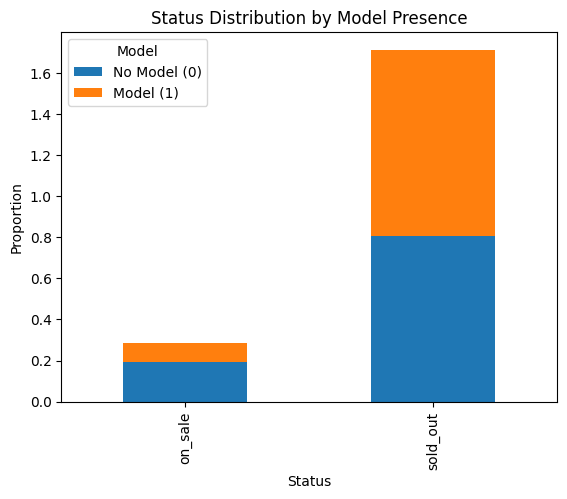

In [4]:
import pandas as pd
import duckdb

# CSVファイルのパスを定義
csv_path = r'C:\Users\caito\Desktop\work\JR-BigData\W04\small_res\all_supplements.csv'

# CSVファイルを読み込む
data = pd.read_csv(csv_path)

# 'model'列でグループ化し、'status'列の分布を比較
model_grouped = data.groupby('model')['status'].value_counts(normalize=True).unstack().fillna(0)

# 結果を表示
print(model_grouped)

# グラフで表示
import matplotlib.pyplot as plt

model_grouped.T.plot(kind='bar', stacked=True)
plt.title('Status Distribution by Model Presence')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.legend(title='Model', labels=['No Model (0)', 'Model (1)'])
plt.show()


Number of samples in treatment group: 991
Number of samples in control group: 991


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

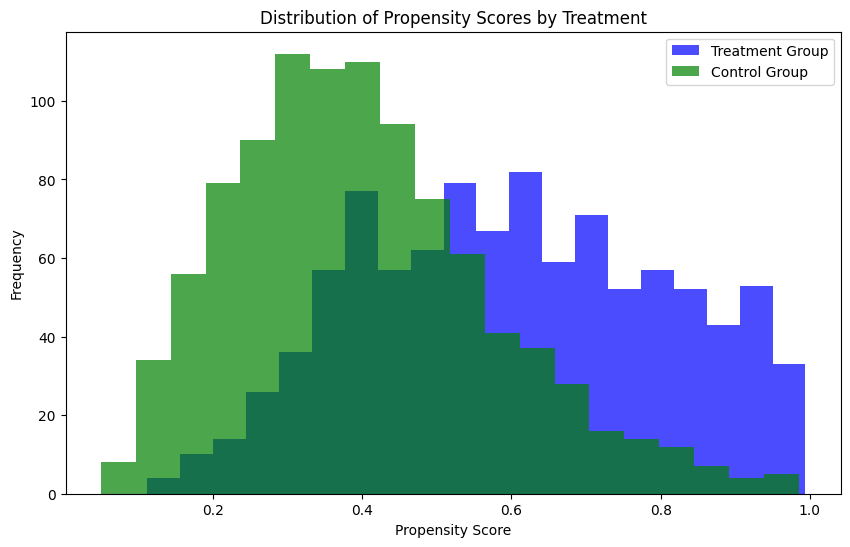

Number of matched pairs: 991
Logistic Regression Results: {'Average Treatment Effect on the Treated (ATT)': 0.06458123107971747, 'Best Logistic Regression Parameters': {'C': 0.1}}
Random Forest Results: {'Accuracy': 0.707808564231738, 'ROC AUC Score': 0.7944207533759772}


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from pathlib import Path

# データの読み込み
base_path = Path('../W04/small_res')
file_path = base_path / 'all_supplements.csv'
df = pd.read_csv(file_path)

# 'status' 列を二値化（売り切れとそれ以外）
df['status_binary'] = df['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 商品説明の長さを特徴量として追加
df['description_length'] = df['description'].apply(len)

# 欠損値の補完（数値カラムのみを対象）
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 名義尺度のワンホットエンコーディング
nominal_cols = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area']
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = onehot_encoder.fit_transform(df[nominal_cols])

# 順序尺度のラベルエンコーディング
ordinal_cols = ['item_condition', 'shipping_duration']
label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 名義尺度のエンコード結果をデータフレームに追加
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_cols))
df_encoded = pd.concat([df, nominal_encoded_df], axis=1).drop(columns=nominal_cols)

# モデルの有無をトリートメント変数とする
df_encoded['treatment'] = df_encoded['model']

# データ数を揃えるために処置群と対照群のサンプリングを行う
treated = df_encoded[df_encoded['treatment'] == 1]
control = df_encoded[df_encoded['treatment'] == 0]

# 最小のサンプル数に合わせてサンプリング
min_sample_size = min(len(treated), len(control))
treated_sampled = treated.sample(n=min_sample_size, random_state=42)
control_sampled = control.sample(n=min_sample_size, random_state=42)

# サンプル数の表示
print(f"Number of samples in treatment group: {len(treated_sampled)}")
print(f"Number of samples in control group: {len(control_sampled)}")

# サンプルを結合
df_balanced = pd.concat([treated_sampled, control_sampled])

# 傾向スコアの計算（ロジスティック回帰）
covariates = ['price', 'item_condition', 'size', 'shipping_duration', 
              'num_likes', 'num_comments', 'description_length'] + list(nominal_encoded_df.columns)

X = df_balanced[covariates]
y = df_balanced['treatment']

# ロジスティック回帰のハイパーパラメータ調整
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logistic = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
best_logistic = grid_search.best_estimator_

# 傾向スコアを計算
df_balanced['propensity_score'] = best_logistic.predict_proba(X)[:, 1]

# 傾向スコアの分布をプロット（処置群と対照群）
plt.figure(figsize=(10, 6))
plt.hist(df_balanced[df_balanced['treatment'] == 1]['propensity_score'], bins=20, color='blue', alpha=0.7, label='Treatment Group')
plt.hist(df_balanced[df_balanced['treatment'] == 0]['propensity_score'], bins=20, color='green', alpha=0.7, label='Control Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Propensity Scores by Treatment')
plt.legend()
plt.show()

# 傾向スコアに基づくマッチング（最近傍マッチング）
treated_balanced = df_balanced[df_balanced['treatment'] == 1]
control_balanced = df_balanced[df_balanced['treatment'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_balanced[['propensity_score']])
distances, indices = nn.kneighbors(treated_balanced[['propensity_score']])
matched_control_balanced = control_balanced.iloc[indices.flatten()]

# マッチング結果の結合
matched_balanced = pd.concat([treated_balanced, matched_control_balanced])

# マッチングされたデータの数を表示
print(f"Number of matched pairs: {len(matched_balanced)//2}")

# ATTの計算
att_balanced = matched_balanced['status_binary'][matched_balanced['treatment'] == 1].mean() - matched_balanced['status_binary'][matched_balanced['treatment'] == 0].mean()

# ロジスティック回帰の結果の表示
logistic_results_balanced = {
    'Average Treatment Effect on the Treated (ATT)': att_balanced,
    'Best Logistic Regression Parameters': grid_search.best_params_
}

# ランダムフォレストを使用して精度を評価
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# モデルの精度を評価
accuracy_balanced = accuracy_score(y_test, y_pred)
roc_auc_balanced = roc_auc_score(y_test, y_proba)

random_forest_results_balanced = {
    'Accuracy': accuracy_balanced,
    'ROC AUC Score': roc_auc_balanced
}

print("Logistic Regression Results:", logistic_results_balanced)
print("Random Forest Results:", random_forest_results_balanced)


Number of samples in treatment group: 991
Number of samples in control group: 991


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

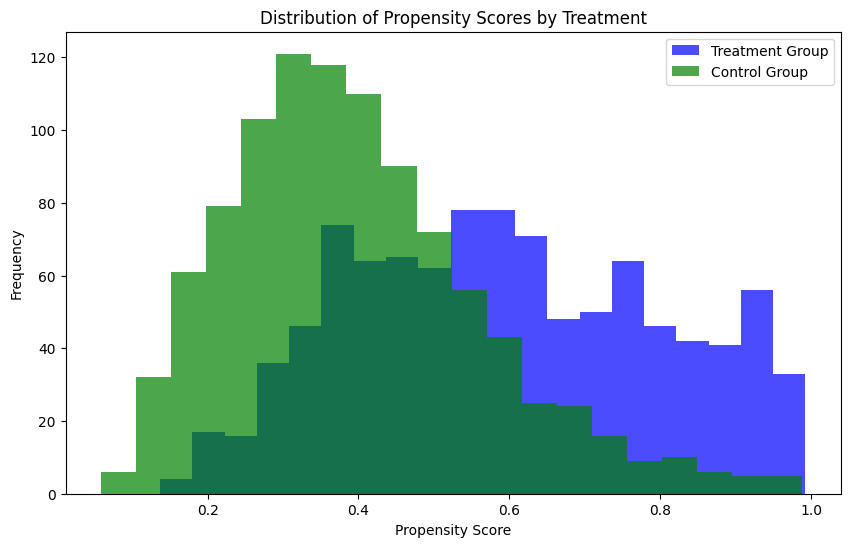

Number of matched pairs: 991
Logistic Regression Results: {'Average Treatment Effect on the Treated (ATT)': 0.052472250252270425, 'Best Logistic Regression Parameters': {'C': 0.1}}
Random Forest Results: {'Accuracy': 0.7153652392947103, 'ROC AUC Score': 0.8027210884353743}


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from pathlib import Path

# データの読み込み
base_path = Path('../W04/small_res')
file_path = base_path / 'all_supplements.csv'
df = pd.read_csv(file_path)

# 'status' 列を二値化（売り切れとそれ以外）
df['status_binary'] = df['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 商品説明の長さを特徴量として追加
df['description_length'] = df['description'].apply(len)

# 名義尺度のワンホットエンコーディング
nominal_cols = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area']
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = onehot_encoder.fit_transform(df[nominal_cols])

# 順序尺度のラベルエンコーディング
ordinal_cols = ['item_condition', 'shipping_duration']
label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 名義尺度のエンコード結果をデータフレームに追加
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_cols))
df_encoded = pd.concat([df, nominal_encoded_df], axis=1).drop(columns=nominal_cols)

# モデルの有無をトリートメント変数とする
df_encoded['treatment'] = df_encoded['model']

# データ数を揃えるために処置群と対照群のサンプリングを行う
treated = df_encoded[df_encoded['treatment'] == 1]
control = df_encoded[df_encoded['treatment'] == 0]

# 最小のサンプル数に合わせてサンプリング
min_sample_size = min(len(treated), len(control))
treated_sampled = treated.sample(n=min_sample_size, random_state=42)
control_sampled = control.sample(n=min_sample_size, random_state=42)

# サンプル数の表示
print(f"Number of samples in treatment group: {len(treated_sampled)}")
print(f"Number of samples in control group: {len(control_sampled)}")

# サンプルを結合
df_balanced = pd.concat([treated_sampled, control_sampled])

# 傾向スコアの計算（ロジスティック回帰）
covariates = ['price', 'item_condition', 'size', 'shipping_duration', 
              'num_likes', 'num_comments', 'description_length'] + list(nominal_encoded_df.columns)

# 欠損値を含む行を削除
df_balanced = df_balanced.dropna(subset=covariates + ['treatment'])

X = df_balanced[covariates]
y = df_balanced['treatment']

# ロジスティック回帰のハイパーパラメータ調整
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logistic = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
best_logistic = grid_search.best_estimator_

# 傾向スコアを計算
df_balanced['propensity_score'] = best_logistic.predict_proba(X)[:, 1]

# 傾向スコアの分布をプロット（処置群と対照群）
plt.figure(figsize=(10, 6))
plt.hist(df_balanced[df_balanced['treatment'] == 1]['propensity_score'], bins=20, color='blue', alpha=0.7, label='Treatment Group')
plt.hist(df_balanced[df_balanced['treatment'] == 0]['propensity_score'], bins=20, color='green', alpha=0.7, label='Control Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Propensity Scores by Treatment')
plt.legend()
plt.show()

# 傾向スコアに基づくマッチング（最近傍マッチング）
treated_balanced = df_balanced[df_balanced['treatment'] == 1]
control_balanced = df_balanced[df_balanced['treatment'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_balanced[['propensity_score']])
distances, indices = nn.kneighbors(treated_balanced[['propensity_score']])
matched_control_balanced = control_balanced.iloc[indices.flatten()]

# マッチング結果の結合
matched_balanced = pd.concat([treated_balanced, matched_control_balanced])

# マッチングされたデータの数を表示
print(f"Number of matched pairs: {len(matched_balanced)//2}")

# ATTの計算
att_balanced = matched_balanced['status_binary'][matched_balanced['treatment'] == 1].mean() - matched_balanced['status_binary'][matched_balanced['treatment'] == 0].mean()

# ロジスティック回帰の結果の表示
logistic_results_balanced = {
    'Average Treatment Effect on the Treated (ATT)': att_balanced,
    'Best Logistic Regression Parameters': grid_search.best_params_
}

# ランダムフォレストを使用して精度を評価
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# モデルの精度を評価
accuracy_balanced = accuracy_score(y_test, y_pred)
roc_auc_balanced = roc_auc_score(y_test, y_proba)

random_forest_results_balanced = {
    'Accuracy': accuracy_balanced,
    'ROC AUC Score': roc_auc_balanced
}

print("Logistic Regression Results:", logistic_results_balanced)
print("Random Forest Results:", random_forest_results_balanced)


Number of samples in treatment group: 991
Number of samples in control group: 991


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

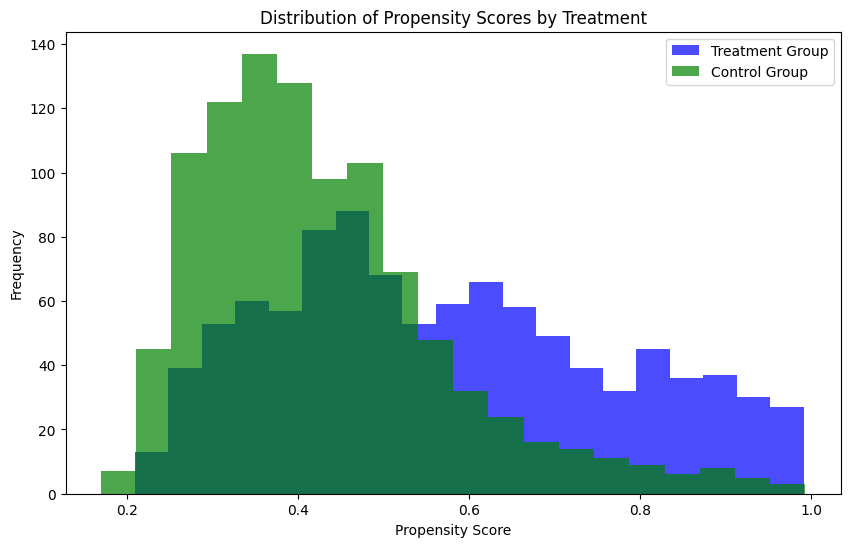

Number of matched pairs: 991
Logistic Regression Results: {'Average Treatment Effect on the Treated (ATT)': 0.06861755802219982, 'Best Logistic Regression Parameters': {'C': 0.1}}
Random Forest Results: {'Accuracy': 0.6952141057934509, 'ROC AUC Score': 0.7763986191491522}


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from pathlib import Path

# データの読み込み
base_path = Path('../W04/small_res')
file_path = base_path / 'all_supplements.csv'
df = pd.read_csv(file_path)

# 'status' 列を二値化（売り切れとそれ以外）
df['status_binary'] = df['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 商品説明の長さを特徴量として追加
df['description_length'] = df['description'].apply(len)

# 欠損値の補完（数値カラムのみを対象）
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 名義尺度と順序尺度のFrequency Encoding
cols_to_encode = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area', 'item_condition', 'shipping_duration']
for col in cols_to_encode:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

# モデルの有無をトリートメント変数とする
df['treatment'] = df['model']

# データ数を揃えるために処置群と対照群のサンプリングを行う
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

# 最小のサンプル数に合わせてサンプリング
min_sample_size = min(len(treated), len(control))
treated_sampled = treated.sample(n=min_sample_size, random_state=42)
control_sampled = control.sample(n=min_sample_size, random_state=42)

# サンプル数の表示
print(f"Number of samples in treatment group: {len(treated_sampled)}")
print(f"Number of samples in control group: {len(control_sampled)}")

# サンプルを結合
df_balanced = pd.concat([treated_sampled, control_sampled])

# 傾向スコアの計算（ロジスティック回帰）
covariates = ['price', 'item_condition', 'size', 'shipping_duration', 
              'num_likes', 'num_comments', 'description_length'] + cols_to_encode

X = df_balanced[covariates]
y = df_balanced['treatment']

# ロジスティック回帰のハイパーパラメータ調整
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logistic = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
best_logistic = grid_search.best_estimator_

# 傾向スコアを計算
df_balanced['propensity_score'] = best_logistic.predict_proba(X)[:, 1]

# 傾向スコアの分布をプロット（処置群と対照群）
plt.figure(figsize=(10, 6))
plt.hist(df_balanced[df_balanced['treatment'] == 1]['propensity_score'], bins=20, color='blue', alpha=0.7, label='Treatment Group')
plt.hist(df_balanced[df_balanced['treatment'] == 0]['propensity_score'], bins=20, color='green', alpha=0.7, label='Control Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Propensity Scores by Treatment')
plt.legend()
plt.show()

# 傾向スコアに基づくマッチング（最近傍マッチング）
treated_balanced = df_balanced[df_balanced['treatment'] == 1]
control_balanced = df_balanced[df_balanced['treatment'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_balanced[['propensity_score']])
distances, indices = nn.kneighbors(treated_balanced[['propensity_score']])
matched_control_balanced = control_balanced.iloc[indices.flatten()]

# マッチング結果の結合
matched_balanced = pd.concat([treated_balanced, matched_control_balanced])

# マッチングされたデータの数を表示
print(f"Number of matched pairs: {len(matched_balanced)//2}")

# ATTの計算
att_balanced = matched_balanced['status_binary'][matched_balanced['treatment'] == 1].mean() - matched_balanced['status_binary'][matched_balanced['treatment'] == 0].mean()

# ロジスティック回帰の結果の表示
logistic_results_balanced = {
    'Average Treatment Effect on the Treated (ATT)': att_balanced,
    'Best Logistic Regression Parameters': grid_search.best_params_
}

# ランダムフォレストを使用して精度を評価
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# モデルの精度を評価
accuracy_balanced = accuracy_score(y_test, y_pred)
roc_auc_balanced = roc_auc_score(y_test, y_proba)

random_forest_results_balanced = {
    'Accuracy': accuracy_balanced,
    'ROC AUC Score': roc_auc_balanced
}

print("Logistic Regression Results:", logistic_results_balanced)
print("Random Forest Results:", random_forest_results_balanced)


Number of samples in treatment group: 991
Number of samples in control group: 991


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

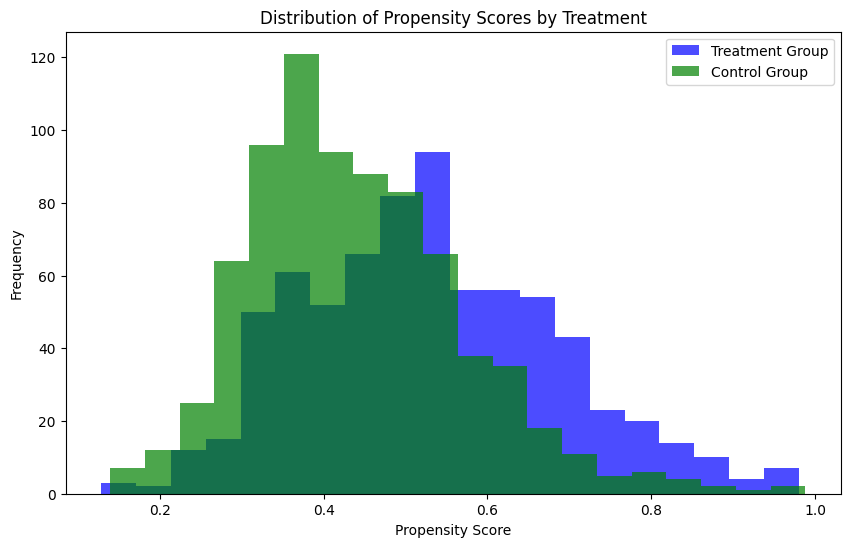

Number of matched pairs: 724
Logistic Regression Results: {'Average Treatment Effect on the Treated (ATT)': 0.07044198895027631, 'Best Logistic Regression Parameters': {'C': 0.01}}
Random Forest Results: {'Accuracy': 0.7209302325581395, 'ROC AUC Score': 0.7632706235647412}


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from pathlib import Path

# データの読み込み
base_path = Path('../W04/small_res')
file_path = base_path / 'all_supplements.csv'
df = pd.read_csv(file_path)

# 'status' 列を二値化（売り切れとそれ以外）
df['status_binary'] = df['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 商品説明の長さを特徴量として追加
df['description_length'] = df['description'].apply(len)

# 名義尺度と順序尺度のFrequency Encoding
cols_to_encode = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area', 'item_condition', 'shipping_duration']
for col in cols_to_encode:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

# モデルの有無をトリートメント変数とする
df['treatment'] = df['model']

# データ数を揃えるために処置群と対照群のサンプリングを行う
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

# 最小のサンプル数に合わせてサンプリング
min_sample_size = min(len(treated), len(control))
treated_sampled = treated.sample(n=min_sample_size, random_state=42)
control_sampled = control.sample(n=min_sample_size, random_state=42)

# サンプル数の表示
print(f"Number of samples in treatment group: {len(treated_sampled)}")
print(f"Number of samples in control group: {len(control_sampled)}")

# サンプルを結合
df_balanced = pd.concat([treated_sampled, control_sampled])

# 傾向スコアの計算（ロジスティック回帰）
covariates = ['price', 'item_condition', 'size', 'shipping_duration', 
              'num_likes', 'num_comments', 'description_length'] + cols_to_encode

X = df_balanced[covariates]
y = df_balanced['treatment']

# 欠損値を含む行を削除
X = X.dropna()
y = y[X.index]

# ロジスティック回帰のハイパーパラメータ調整
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logistic = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
best_logistic = grid_search.best_estimator_

# 傾向スコアを計算
df_balanced.loc[X.index, 'propensity_score'] = best_logistic.predict_proba(X)[:, 1]

# 傾向スコアの分布をプロット（処置群と対照群）
plt.figure(figsize=(10, 6))
plt.hist(df_balanced[df_balanced['treatment'] == 1]['propensity_score'].dropna(), bins=20, color='blue', alpha=0.7, label='Treatment Group')
plt.hist(df_balanced[df_balanced['treatment'] == 0]['propensity_score'].dropna(), bins=20, color='green', alpha=0.7, label='Control Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Propensity Scores by Treatment')
plt.legend()
plt.show()

# 傾向スコアに基づくマッチング（最近傍マッチング）
treated_balanced = df_balanced[(df_balanced['treatment'] == 1) & (~df_balanced['propensity_score'].isna())]
control_balanced = df_balanced[(df_balanced['treatment'] == 0) & (~df_balanced['propensity_score'].isna())]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_balanced[['propensity_score']])
distances, indices = nn.kneighbors(treated_balanced[['propensity_score']])
matched_control_balanced = control_balanced.iloc[indices.flatten()]

# マッチング結果の結合
matched_balanced = pd.concat([treated_balanced, matched_control_balanced])

# マッチングされたデータの数を表示
print(f"Number of matched pairs: {len(matched_balanced)//2}")

# ATTの計算
att_balanced = matched_balanced['status_binary'][matched_balanced['treatment'] == 1].mean() - matched_balanced['status_binary'][matched_balanced['treatment'] == 0].mean()

# ロジスティック回帰の結果の表示
logistic_results_balanced = {
    'Average Treatment Effect on the Treated (ATT)': att_balanced,
    'Best Logistic Regression Parameters': grid_search.best_params_
}

# ランダムフォレストを使用して精度を評価
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# モデルの精度を評価
accuracy_balanced = accuracy_score(y_test, y_pred)
roc_auc_balanced = roc_auc_score(y_test, y_proba)

random_forest_results_balanced = {
    'Accuracy': accuracy_balanced,
    'ROC AUC Score': roc_auc_balanced
}

print("Logistic Regression Results:", logistic_results_balanced)
print("Random Forest Results:", random_forest_results_balanced)


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.na

Number of samples in treatment group: 991
Number of samples in control group: 991


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

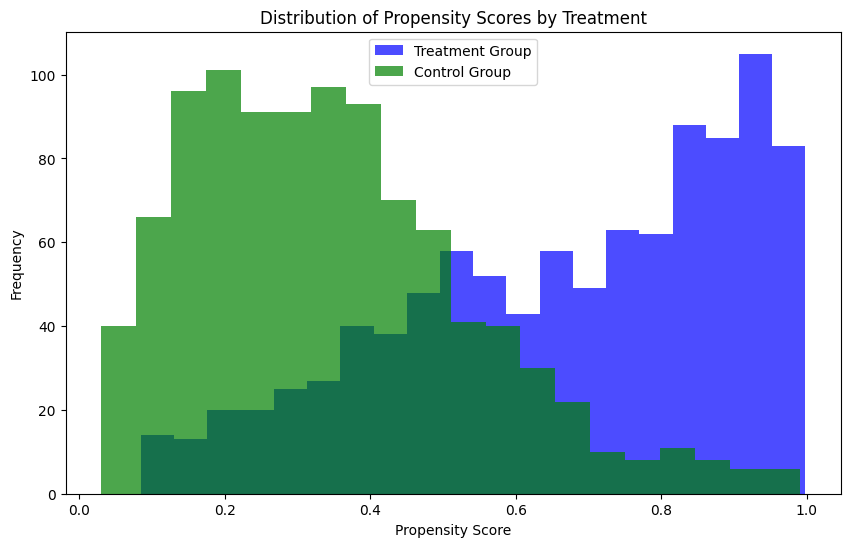

Number of matched pairs: 991
Logistic Regression Results: {'Average Treatment Effect on the Treated (ATT)': 0.0928355196770938, 'Best Logistic Regression Parameters': {'C': 10}}
Random Forest Results: {'Accuracy': 0.7858942065491183, 'ROC AUC Score': 0.8587420042643924}


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from category_encoders.target_encoder import TargetEncoder
from pathlib import Path

# データの読み込み
base_path = Path('../W04/small_res')
file_path = base_path / 'all_supplements.csv'
df = pd.read_csv(file_path)

# 'status' 列を二値化（売り切れとそれ以外）
df['status_binary'] = df['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 商品説明の長さを特徴量として追加
df['description_length'] = df['description'].apply(len)

# モデルの有無をトリートメント変数とする
df['treatment'] = df['model']

# 名義尺度のHold-Out Encoding
nominal_cols = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area']
encoder = TargetEncoder(cols=nominal_cols)

# データを学習用と検証用に分割（Hold-Out Encodingのため）
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['treatment'])

# エンコーディングの適用
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()
df_train_encoded[nominal_cols] = encoder.fit_transform(df_train[nominal_cols], df_train['treatment'])
df_test_encoded[nominal_cols] = encoder.transform(df_test[nominal_cols])

# 順序尺度のラベルエンコーディング
ordinal_cols = ['item_condition', 'shipping_duration']
label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])
    df_test_encoded[col] = le.transform(df_test_encoded[col])
    label_encoders[col] = le

# 学習用と検証用のデータを再結合
df_encoded = pd.concat([df_train_encoded, df_test_encoded], ignore_index=True)

# データ数を揃えるために処置群と対照群のサンプリングを行う
treated = df_encoded[df_encoded['treatment'] == 1]
control = df_encoded[df_encoded['treatment'] == 0]

# 最小のサンプル数に合わせてサンプリング
min_sample_size = min(len(treated), len(control))
treated_sampled = treated.sample(n=min_sample_size, random_state=42)
control_sampled = control.sample(n=min_sample_size, random_state=42)

# サンプル数の表示
print(f"Number of samples in treatment group: {len(treated_sampled)}")
print(f"Number of samples in control group: {len(control_sampled)}")

# サンプルを結合
df_balanced = pd.concat([treated_sampled, control_sampled])

# 傾向スコアの計算（ロジスティック回帰）
covariates = ['price', 'item_condition', 'size', 'shipping_duration', 
              'num_likes', 'num_comments', 'description_length'] + nominal_cols

# 欠損値を含む行を削除
df_balanced = df_balanced.dropna(subset=covariates + ['treatment'])

X = df_balanced[covariates]
y = df_balanced['treatment']

# ロジスティック回帰のハイパーパラメータ調整
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logistic = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
best_logistic = grid_search.best_estimator_

# 傾向スコアを計算
df_balanced['propensity_score'] = best_logistic.predict_proba(X)[:, 1]

# 傾向スコアの分布をプロット（処置群と対照群）
plt.figure(figsize=(10, 6))
plt.hist(df_balanced[df_balanced['treatment'] == 1]['propensity_score'], bins=20, color='blue', alpha=0.7, label='Treatment Group')
plt.hist(df_balanced[df_balanced['treatment'] == 0]['propensity_score'], bins=20, color='green', alpha=0.7, label='Control Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Propensity Scores by Treatment')
plt.legend()
plt.show()

# 傾向スコアに基づくマッチング（最近傍マッチング）
treated_balanced = df_balanced[df_balanced['treatment'] == 1]
control_balanced = df_balanced[df_balanced['treatment'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_balanced[['propensity_score']])
distances, indices = nn.kneighbors(treated_balanced[['propensity_score']])
matched_control_balanced = control_balanced.iloc[indices.flatten()]

# マッチング結果の結合
matched_balanced = pd.concat([treated_balanced, matched_control_balanced])

# マッチングされたデータの数を表示
print(f"Number of matched pairs: {len(matched_balanced)//2}")

# ATTの計算
att_balanced = matched_balanced['status_binary'][matched_balanced['treatment'] == 1].mean() - matched_balanced['status_binary'][matched_balanced['treatment'] == 0].mean()

# ロジスティック回帰の結果の表示
logistic_results_balanced = {
    'Average Treatment Effect on the Treated (ATT)': att_balanced,
    'Best Logistic Regression Parameters': grid_search.best_params_
}

# ランダムフォレストを使用して精度を評価
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# モデルの精度を評価
accuracy_balanced = accuracy_score(y_test, y_pred)
roc_auc_balanced = roc_auc_score(y_test, y_proba)

random_forest_results_balanced = {
    'Accuracy': accuracy_balanced,
    'ROC AUC Score': roc_auc_balanced
}

print("Logistic Regression Results:", logistic_results_balanced)
print("Random Forest Results:", random_forest_results_balanced)


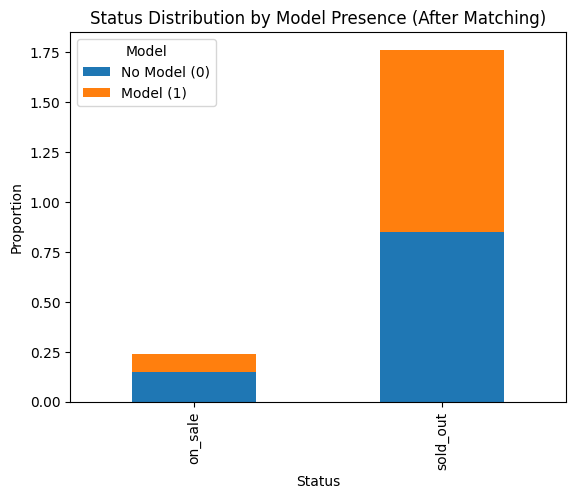

C:\Users\caito\AppData\Local\Temp\ipykernel_29152\1537226463.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treatment['propensity_score'], label='Treatment', shade=True)
C:\Users\caito\AppData\Local\Temp\ipykernel_29152\1537226463.py:71: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_control['propensity_score'], label='Control', shade=True)


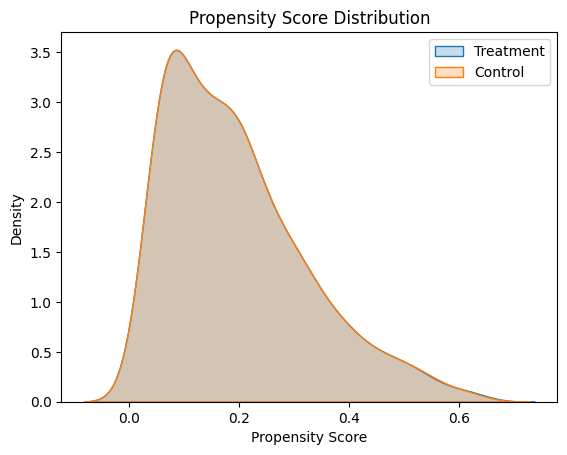

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルのパスを定義
csv_path = r'C:\Users\caito\Desktop\work\JR-BigData\W04\small_res\all_supplements.csv'

# データを読み込む
data = pd.read_csv(csv_path)

# 欠損値の処理 - 欠損値のある行を削除（他の方法も検討可）
data = data.dropna()

# 外れ値の処理 - IQRを用いた外れ値の除去
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

for col in ['price', 'item_condition', 'size', 'shipping_duration', 'num_likes', 'num_comments']:
    data = remove_outliers(data, col)

# 共変量とターゲット変数
covariates = ['price', 'item_condition', 'size', 'shipping_duration', 'num_likes', 'num_comments']
X = data[covariates]
y = data['model']

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ロジスティック回帰で傾向スコアを計算
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)
propensity_scores = log_reg.predict_proba(X_scaled)[:, 1]

# 傾向スコアをデータフレームに追加
data['propensity_score'] = propensity_scores

# マッチング - 最近傍法を使用
treatment = data[data['model'] == 1]
control = data[data['model'] == 0]

# 最近傍法でマッチングを行う
nbrs = NearestNeighbors(n_neighbors=1).fit(control[['propensity_score']])
distances, indices = nbrs.kneighbors(treatment[['propensity_score']])
matched_control = control.iloc[indices.flatten()]

# マッチング後のデータセットを作成
matched_data = pd.concat([treatment, matched_control])

# マッチング後のデータで'status'の分布を比較
status_dist = matched_data.groupby('model')['status'].value_counts(normalize=True).unstack().fillna(0)

# グラフで表示
status_dist.T.plot(kind='bar', stacked=True)
plt.title('Status Distribution by Model Presence (After Matching)')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.legend(title='Model', labels=['No Model (0)', 'Model (1)'])
plt.show()

# 傾向スコアの分布を可視化
sns.kdeplot(treatment['propensity_score'], label='Treatment', shade=True)
sns.kdeplot(matched_control['propensity_score'], label='Control', shade=True)
plt.title('Propensity Score Distribution')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.na

status         0         1
model                     
0       0.163022  0.836978
1       0.097416  0.902584


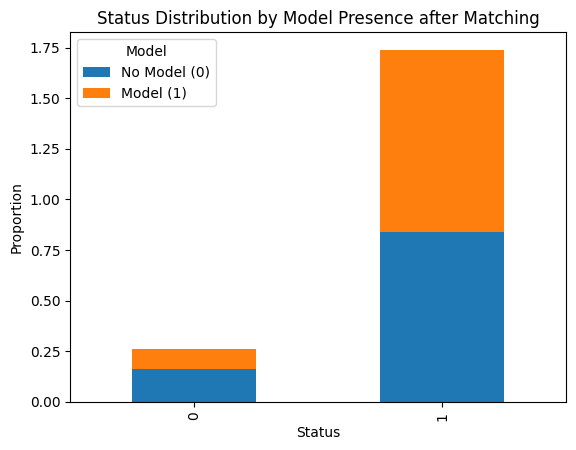

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルのパスを定義
csv_path = r'C:\Users\caito\Desktop\work\JR-BigData\W04\small_res\all_supplements.csv'

# CSVファイルを読み込む
data = pd.read_csv(csv_path)

# 欠損値の排除
data = data.dropna()

# 'status'列を二値化 ('sold_out'とそれ以外)
data['status'] = data['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 共変量のリスト
covariates = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area', 'item_condition', 'shipping_duration']

# Holdout Encodingとラベルエンコーディング
# Holdout Encoding for 'category_id', 'brand_name', 'shipping_payer', 'shipping_from_area'
target_encoder = TargetEncoder(cols=['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area'])
data_encoded = target_encoder.fit_transform(data[covariates], data['model'])

# Label Encoding for 'item_condition', 'shipping_duration'
label_encoders = {}
for col in ['item_condition', 'shipping_duration']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# データフレームをエンコーディング後のデータで更新
for col in ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area']:
    data[col] = data_encoded[col]

# 外れ値の処理 (四分位範囲を用いる)
Q1 = data[covariates].quantile(0.25)
Q3 = data[covariates].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[covariates] < (Q1 - 1.5 * IQR)) | (data[covariates] > (Q3 + 1.5 * IQR))).any(axis=1)]

# ロジスティック回帰を使用して傾向スコアを計算
X = data[covariates]
y = data['model']
logistic = LogisticRegression()
logistic.fit(X, y)
data['propensity_score'] = logistic.predict_proba(X)[:, 1]

# 傾向スコアによるマッチング (ここでは簡略化のために最も近いスコアを持つペアをマッチング)
from sklearn.neighbors import NearestNeighbors

# モデルありとモデルなしのデータに分割
model_1 = data[data['model'] == 1]
model_0 = data[data['model'] == 0]

# 最近傍法でマッチング
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(model_0[['propensity_score']])
distances, indices = neigh.kneighbors(model_1[['propensity_score']])

# マッチングされたデータを作成
matched_data_0 = model_0.iloc[indices.flatten()]
matched_data_1 = model_1.reset_index(drop=True)

# マッチングされたデータを結合
matched_data = pd.concat([matched_data_1, matched_data_0])

# マッチングされたデータで'status'列の分布を比較
status_distribution = matched_data.groupby('model')['status'].value_counts(normalize=True).unstack().fillna(0)
print(status_distribution)

# グラフで表示
status_distribution.T.plot(kind='bar', stacked=True)
plt.title('Status Distribution by Model Presence after Matching')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.legend(title='Model', labels=['No Model (0)', 'Model (1)'])
plt.show()


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.na

ROC AUC Score: 0.8107
Average Treatment Effect (ATE): 0.0656
status         0         1
model                     
0       0.163022  0.836978
1       0.097416  0.902584


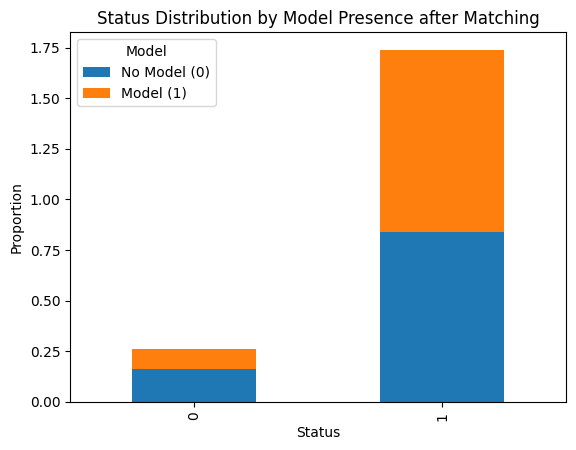

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# CSVファイルのパスを定義
csv_path = r'C:\Users\caito\Desktop\work\JR-BigData\W04\small_res\all_supplements.csv'

# CSVファイルを読み込む
data = pd.read_csv(csv_path)

# 欠損値の排除
data = data.dropna()

# 'status'列を二値化 ('sold_out'とそれ以外)
data['status'] = data['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# 共変量のリスト
covariates = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area', 'item_condition', 'shipping_duration']

# Holdout Encodingとラベルエンコーディング
# Holdout Encoding for 'category_id', 'brand_name', 'shipping_payer', 'shipping_from_area'
target_encoder = TargetEncoder(cols=['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area'])
data_encoded = target_encoder.fit_transform(data[covariates], data['model'])

# Label Encoding for 'item_condition', 'shipping_duration'
label_encoders = {}
for col in ['item_condition', 'shipping_duration']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# データフレームをエンコーディング後のデータで更新
for col in ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area']:
    data[col] = data_encoded[col]

# 外れ値の処理 (四分位範囲を用いる)
Q1 = data[covariates].quantile(0.25)
Q3 = data[covariates].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[covariates] < (Q1 - 1.5 * IQR)) | (data[covariates] > (Q3 + 1.5 * IQR))).any(axis=1)]

# ロジスティック回帰を使用して傾向スコアを計算
X = data[covariates]
y = data['model']
logistic = LogisticRegression()
logistic.fit(X, y)
data['propensity_score'] = logistic.predict_proba(X)[:, 1]

# ROC AUCスコアの計算
roc_auc = roc_auc_score(y, data['propensity_score'])
print(f'ROC AUC Score: {roc_auc:.4f}')

# 傾向スコアによるマッチング (ここでは簡略化のために最も近いスコアを持つペアをマッチング)
from sklearn.neighbors import NearestNeighbors

# モデルありとモデルなしのデータに分割
model_1 = data[data['model'] == 1]
model_0 = data[data['model'] == 0]

# 最近傍法でマッチング
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(model_0[['propensity_score']])
distances, indices = neigh.kneighbors(model_1[['propensity_score']])

# マッチングされたデータを作成
matched_data_0 = model_0.iloc[indices.flatten()]
matched_data_1 = model_1.reset_index(drop=True)

# マッチングされたデータを結合
matched_data = pd.concat([matched_data_1, matched_data_0])

# 平均処置効果 (ATE) の計算
treated_outcomes = matched_data_1['status']
control_outcomes = matched_data_0['status']
ate = treated_outcomes.mean() - control_outcomes.mean()
print(f'Average Treatment Effect (ATE): {ate:.4f}')

# マッチングされたデータで'status'列の分布を比較
status_distribution = matched_data.groupby('model')['status'].value_counts(normalize=True).unstack().fillna(0)
print(status_distribution)

# グラフで表示
status_distribution.T.plot(kind='bar', stacked=True)
plt.title('Status Distribution by Model Presence after Matching')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.legend(title='Model', labels=['No Model (0)', 'Model (1)'])
plt.show()


C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\caito\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.na

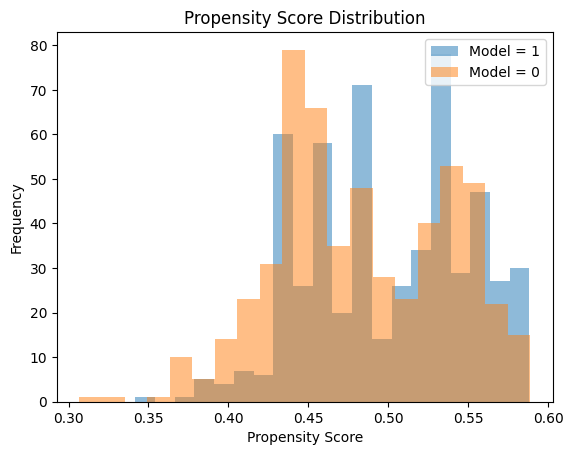

Average Treatment Effect (ATE): 0.1121323529411764
ROC AUC Score: 0.6432876609763402


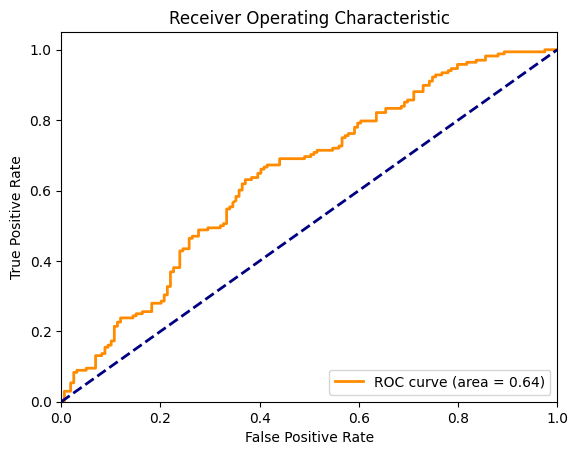

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm

# CSVファイルのパスを定義
csv_path = r'C:\Users\caito\Desktop\work\JR-BigData\W04\small_res\all_supplements.csv'

# CSVファイルを読み込む
data = pd.read_csv(csv_path)

# 欠損値の排除
data = data.dropna()

# 四分位範囲を用いた外れ値の排除
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

# 外れ値の排除
numeric_columns = ['price', 'num_likes', 'num_comments']
for col in numeric_columns:
    data = remove_outliers(data, col)

# 'status' 列を二値化
data['status'] = data['status'].apply(lambda x: 1 if x == 'sold_out' else 0)

# Hold-out Encodingを使って'category_id', 'brand_name', 'shipping_payer', 'shipping_from_area'を数値化する
hold_out_cols = ['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area']
target_enc = TargetEncoder(cols=hold_out_cols)
data[hold_out_cols] = target_enc.fit_transform(data[hold_out_cols], data['status'])

# ラベルエンコーディングを使って'item_condition', 'shipping_duration'を数値化する
label_cols = ['item_condition', 'shipping_duration']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# 処置群（model = 1）と対照群（model = 0）の最小サンプル数に合わせてサンプリング
min_sample_size = min(data[data['model'] == 1].shape[0], data[data['model'] == 0].shape[0])
data_model_1 = data[data['model'] == 1].sample(n=min_sample_size, random_state=42)
data_model_0 = data[data['model'] == 0].sample(n=min_sample_size, random_state=42)
data = pd.concat([data_model_1, data_model_0])

# 傾向スコアの計算
X = data[['category_id', 'brand_name', 'shipping_payer', 'shipping_from_area', 'item_condition', 'shipping_duration']]
y = data['model']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ロジスティック回帰モデルを使用して傾向スコアを計算
ps_model = LogisticRegression()
ps_model.fit(X_train, y_train)
data['propensity_score'] = ps_model.predict_proba(X)[:, 1]

# 傾向スコアの分布を表示
plt.hist(data[data['model'] == 1]['propensity_score'], bins=20, alpha=0.5, label='Model = 1')
plt.hist(data[data['model'] == 0]['propensity_score'], bins=20, alpha=0.5, label='Model = 0')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Propensity Score Distribution')
plt.show()

# 平均処置効果（ATE: Average Treatment Effect）の計算
treated = data[data['model'] == 1]
control = data[data['model'] == 0]

treated_outcome = treated['status']
control_outcome = control['status']

ATE = treated_outcome.mean() - control_outcome.mean()
print(f'Average Treatment Effect (ATE): {ATE}')

# ROC AUC Scoreの計算
roc_auc = roc_auc_score(y_test, ps_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

# ROC曲線のプロット
fpr, tpr, _ = roc_curve(y_test, ps_model.predict_proba(X_test)[:, 1])
roc_auc_value = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
